In [1]:
from BT import BacktestModule, TransactionCost
from strategy import myStrategy
import sl
import matplotlib.pyplot as plt
from Universe import Universe
U0 = sl.load_dict('Universe_test.pkl')

Filter the investable universe to get tradable stocks

In [7]:
new_uni =[]
for ticker, df in U0.dict_ticker.items():
    if df.loc['2019-01-01':'2024-01-01']['valuevolume'].mean()> 5_0000_0000 and min(df.loc['2018-01-01':'2021-01-01']['close'])>2:
        new_uni.append(ticker)
new_uni

['ADVANC.BK',
 'AOT.BK',
 'BANPU.BK',
 'BBL.BK',
 'BDMS.BK',
 'CBG.BK',
 'CPALL.BK',
 'CPF.BK',
 'CPN.BK',
 'DELTA.BK',
 'EA.BK',
 'GPSC.BK',
 'HANA.BK',
 'INTUCH.BK',
 'IVL.BK',
 'KBANK.BK',
 'KCE.BK',
 'KTB.BK',
 'MINT.BK',
 'PTT.BK',
 'PTTEP.BK',
 'PTTGC.BK',
 'SAWAD.BK',
 'SCC.BK',
 'TOP.BK',
 'TRUE.BK']

In [8]:
new_uni = ['ADVANC.BK','AOT.BK','BANPU.BK','BBL.BK','BDMS.BK','BEAUTY.BK','CPALL.BK','CPF.BK','EA.BK','IRPC.BK','IVL.BK','KBANK.BK','KTB.BK',
'KTC.BK','LH.BK','MINT.BK','PTT.BK','PTTEP.BK','PTTGC.BK','SCC.BK','TOP.BK','TRUE.BK']

In [9]:
from Universe import Universe
U1 = Universe(new_uni, start = '2018-01-03', end = '2024-08-30')
U1.prepare()

c:\Users\merre\Desktop\pjthai - Copy\Universe.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvx_cleaned['Ticker'] = i
c:\Users\merre\Desktop\pjthai - Copy\Universe.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvx_cleaned['Ticker'] = i
c:\Users\merre\Desktop\pjthai - Copy\Universe.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

The dataframe is multi-index, which reduces the search time to O(1)

In [13]:
df = U1.dataframe 
df

,,open,low,high,close,return,valuevolume,pctChg
Date,Ticker,,,,,,,
2018-01-03,ADVANC.BK,191.5,191.0,197.5,196.5,2.610961e-02,2.950134e+09,NaN
2018-01-04,ADVANC.BK,196.5,194.0,197.0,194.0,-7.633628e-03,1.643074e+09,-0.012723
2018-01-05,ADVANC.BK,195.0,194.5,197.0,195.0,-4.019533e-08,2.007486e+09,0.005155
2018-01-08,ADVANC.BK,195.0,194.5,197.0,196.0,-2.563992e-03,1.587592e+09,0.005128
2018-01-09,ADVANC.BK,194.5,194.5,194.5,194.5,7.712052e-03,1.343800e+08,-0.007653
...,...,...,...,...,...,...,...,...
2024-08-26,TRUE.BK,10.2,10.1,10.3,10.3,9.803959e-03,2.794045e+08,0.000000
2024-08-27,TRUE.BK,10.3,10.1,10.4,10.3,0.000000e+00,3.480782e+08,0.000000
2024-08-28,TRUE.BK,10.3,10.3,10.3,10.3,9.708682e-03,0.000000e+00,0.000000


Add some indicators to the dataframe to make the future strategy process easier.


Here we add sharpe ratio on a rolling window of 180 days

In [14]:
import numpy as np
import pandas as pd
def calculate_sharpe_ratio(returns):

    mean_return = returns.mean()
    std_return = returns.std()
    if std_return != 0:
        sharpe_ratio = mean_return / std_return
    else:
        sharpe_ratio = np.nan
    
    return sharpe_ratio

df['sharpe_ratio'] = (
    df['return']
    .groupby('Ticker')
    .rolling(window=180)
    .apply(calculate_sharpe_ratio, raw=False)
    .reset_index(level=0, drop=True)
)

In [15]:
import sl 
U1.coordinate()
sl.save_dict(U1, 'U1_test.pkl')

Notice that the following strategy is long only.

<Axes: >

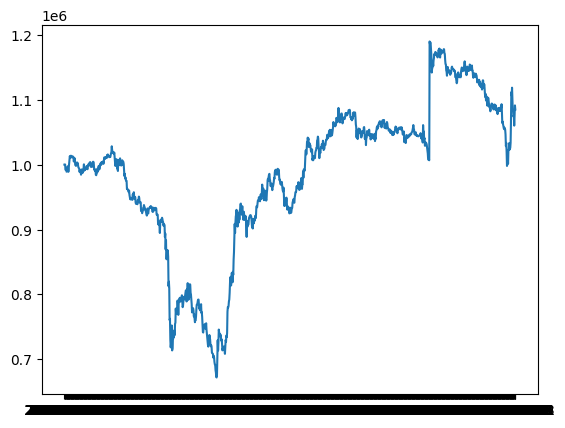

In [16]:
from BT import BacktestModule
from strategy import myStrategy
from Universe import Universe
import sl
import matplotlib.pyplot as plt
U1 = sl.load_dict('U1_test.pkl')
S1  = myStrategy(Universe=U1, stock_select='default', position_strategy='rp', start = '2019-01-05', end = '2024-07-30')
S1.calculate()

backtest = BacktestModule(initial_cash=100_0000, strategy_instance=S1, start = '2019-01-05', end = '2024-02-25', t_cost=['default', 0.000])
backtest.run_backtest()
backtest.plot()

In [17]:
backtest.statistics()

Sharpe ratio: 0.04886021657092147

Average drawdown: 0.07933142100556902

Max drawdown: 0.34662192501054345

CAGR: 0.15994440366099139



[1000000,
 np.float64(999880.9943882283),
 np.float64(1000285.968719948),
 np.float64(992113.1634931657),
 np.float64(992726.5855577063),
 np.float64(993024.6945103186),
 np.float64(989148.2764555763),
 np.float64(989705.4610359297),
 np.float64(992057.6212062833),
 np.float64(997405.0440133138),
 np.float64(995506.2643177377),
 np.float64(988946.3243263507),
 np.float64(994808.794852406),
 np.float64(999484.4391178618),
 np.float64(1005816.9710081756),
 np.float64(1013103.8200893046),
 np.float64(1010570.4870610794),
 np.float64(1011322.2395753062),
 np.float64(1013843.2278663344),
 np.float64(1012259.5978223488),
 np.float64(1012601.4036593408),
 np.float64(1011078.1164520079),
 np.float64(1012551.1146814243),
 np.float64(1012769.1027483263),
 np.float64(1011953.8116657438),
 np.float64(1011700.4158196447),
 np.float64(1004896.3792582742),
 np.float64(1007232.8332056958),
 np.float64(1010229.989148717),
 np.float64(1006654.1344580519),
 np.float64(999473.4501613383),
 np.float64(9989

Get the data of SET100 index. This is only a temporary solution because the Yahoo Finance interface is unable to obtain data of SET100 index. We are currently investigating the cause and alternative solutions.

In [18]:
import cvxportfolio as cvx
simulator_test = cvx.StockMarketSimulator(['BSET100.BK'])
benchmark = simulator_test.backtest(cvx.Uniform(), start_time = '2019-01-05', end_time = '2024-02-25')

Updating data.


In [19]:
import pandas as pd
df = (1+benchmark.returns).cumprod()
datelist =[pd.to_datetime(ts).strftime('%Y-%m-%d') for ts in df.index.tolist()]
port_dict = dict(zip(datelist, df*100_0000))

Hedge with index (this part need to be refined in future versions)

In [20]:
final = {date: -port_dict[date] + backtest.portfolio_value[date]+ 100_0000 for date in port_dict.keys()}

<Axes: >

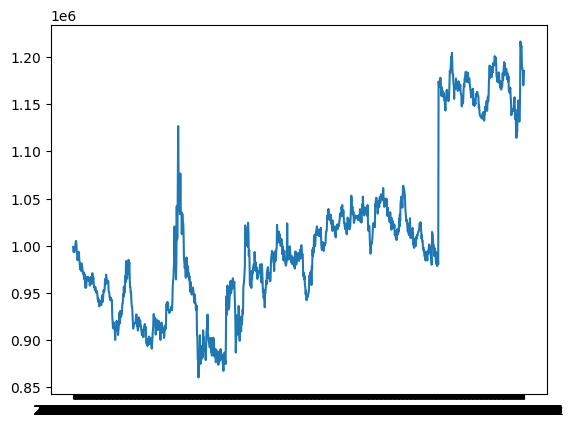

In [21]:
backtest.portfolio_value = final
backtest.plot()

Final result

In [22]:
backtest.statistics()

Sharpe ratio: 0.1697699367125663

Average drawdown: 0.09223530297868963

Max drawdown: 0.2369067684536421

CAGR: 0.17148985901474223



[np.float64(998666.2269158593),
 np.float64(993175.279883237),
 np.float64(993854.0997014772),
 np.float64(993484.0350265398),
 np.float64(995749.1097792883),
 np.float64(995806.6827481232),
 np.float64(999314.4551978867),
 np.float64(1003633.5681357763),
 np.float64(1005047.029528047),
 np.float64(1002164.678227825),
 np.float64(992654.2408049133),
 np.float64(990648.6360976143),
 np.float64(984505.6937379572),
 np.float64(986904.1691127662),
 np.float64(992223.9445317445),
 np.float64(993624.6572587361),
 np.float64(992409.4855938941),
 np.float64(985095.3614004637),
 np.float64(982528.1496329451),
 np.float64(975001.8638195366),
 np.float64(975445.6523018641),
 np.float64(974951.6414198074),
 np.float64(973202.6116538679),
 np.float64(981238.9176696594),
 np.float64(978034.9270009174),
 np.float64(978115.5806570619),
 np.float64(973567.4068519184),
 np.float64(970663.4705672428),
 np.float64(972005.1247449705),
 np.float64(968758.5710653774),
 np.float64(971197.1031550803),
 np.floa